<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/%D0%A2%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D0%B8_%D0%BF%D0%B5%D1%80%D0%B5%D0%B4%D0%B0%D1%87%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_6_21_03_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# БКБО-01/02-16, Технология обработки и передачи данных
**Лекция** 21 Марта 2020

**Тема** *Расчет и применение формирующих и согласованных фильтров в системах цифровой передачи данных*.

**Постоянная ссылка (ipynb):** https://colab.research.google.com/drive/1ckWC-KpXlwsrnvlzo14gskSfG-Md_hYz 

Один из ключевых параметров цифровой системы связи - бодовая скорость или ширина полосы канала определяет требования к спектральным характеристикам сигнала. 

В самом простом случае для конкретного оборудования регламентируется диапазон частот $\omega=\omega_0-\frac{B}{2}\cdots \omega_0+\frac{B}{2}$ в котором разрешается передача сигнала. Здесь $\omega_0$ центральная частота, $B$-ширина полосы передачи, она же бодовая скорость, символов в секунду. В базовой полосе частот $\omega_0=0$ и частотное ограничение выглядит следующим образом:

Text(0.5, 1.0, 'Спектральная маска сигнала')

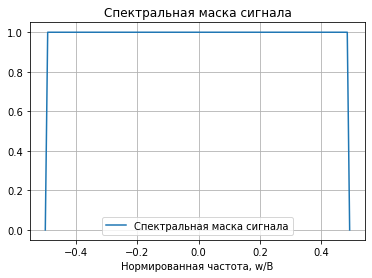

In [0]:
import matplotlib.pyplot as plt
import numpy as np
M     = 128
H     = np.ones( (M,) )
H[0]  = 0.0 ;
H[-1] = 0.0 ;
plt.plot((np.arange(0.,M)-M/2)/M,H)
plt.grid('true')
plt.legend(['Спектральная маска сигнала'])
plt.xlabel('Нормированная частота, w/B')
plt.title('Спектральная маска сигнала')

Сигнал в базовой полосе определяется в виде последовательности символов $x_n$ (в общем случае $x_n$-комплексные). Если предположить, что энтропия источника передаваемой информации максимальна, то такую последовательность символов можно рассмативать как случайный процесс с рвномерным спектром (**почему?**). Спектральная плотность такой последовательности представлена ниже: 

Text(0.5, 1.0, 'Спектральная плотность в базовой полосе')

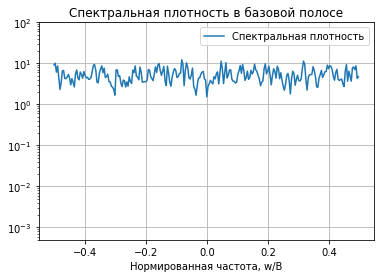

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
N         = 1000 
x_re      = (np.random.randint(3, size=(N,), dtype='I') * 2) - 3*np.ones((N,))
x_im      = (np.random.randint(3, size=(N,), dtype='I') * 2) - 3*np.ones((N,))
x         = np.vectorize(complex)(x_re,x_im)
frex,Pxx  = signal.welch( x,return_onesided=False,nperseg=256, noverlap=210)
plt.semilogy( np.fft.fftshift(frex),np.fft.fftshift(Pxx) )
plt.ylim([0.5e-3, 100])
plt.grid('true')
plt.legend(['Спектральная плотность'])
plt.xlabel('Нормированная частота, w/B')
plt.title('Спектральная плотность в базовой полосе')


Для того чтобы обеспечить заданный уровень мощности вне разрешенной полосы частота дискретизации сигнала $F_d$ должна быть выше чем $B$. При этом бодовая скорость должна остаться прежней. Рассмотрим случай $F_d=2B$. В этом случае сигнал $y_k$ на удвоенной частоте дискретизации будет содержать 2 значения на каждый символ исходной последовательности $x_n$ (будем использовать обозначение 2SPS (2 samples per symbol)). Этого можно достичь, например, вставив нулевые отсчеты в исходную последовательность символов, получим сигнал $\vec{y}=(x_1,0,x_2,0,\cdots,x_n,0,\cdots)$. Рассмотрим спектр такой последовательности

$Y(\omega)=\sum_{n=0}^{N}x_n e^{-j\omega 2n}$

Сравним со спектром исходной символьной последовательности:

$X(\omega)=\sum_{n=0}^{N}x_n e^{-j\omega n}$

Спектр любой дискретной последовательноти периодичен по $\omega$ с периодом $2\pi$. Это означает, что спектр сигнала $Y$ будет периодичен с периодом $\pi$.

Text(0.5, 1.0, 'Спектральная плотность в базовой полосе')

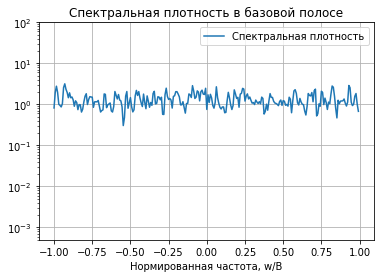

In [43]:
import  matplotlib.pyplot as plt
import  numpy as np
from    scipy import signal
import  numpy.matlib
N         = 1000 
x_re      = (np.random.randint(3, size=(N,), dtype='I') * 2) - 3*np.ones((N,))
x_im      = (np.random.randint(3, size=(N,), dtype='I') * 2) - 3*np.ones((N,))
x         = np.vectorize(complex)(x_re,x_im)
y         = np.vstack((x.transpose(),np.zeros((1,N))))
y         = y.flatten()
frex,Pxx  = signal.welch( y,return_onesided=False,nperseg=256, noverlap=210,fs=2)
plt.semilogy( np.fft.fftshift(frex),np.fft.fftshift(Pxx) )
plt.ylim([0.5e-3, 100])
plt.grid('true')
plt.legend(['Спектральная плотность'])
plt.xlabel('Нормированная частота, w/B')
plt.title('Спектральная плотность в базовой полосе')

Разрешенный диапазон частот $-\frac{B}{2}\cdots \frac{B}{2}$, сигнал вне этой полосы должен быть подавлен до некоторого заранее определенного уровня. С этой целью можно использовать фильтр нижних частот, например, КИХ фильтр. Но в реальных цифровых устройствах используются специализированные фильтры. На это есть 2 причины:

* Необходимо обеспечить надежное подавление при ограниченной длине фильтра.
* Необходимо обеспечить отсутствие взаимного влияния символов друг на друга, т.е. не должно быть корреляции между двумя копиями импульсного отклика фильтра, сдвинутыми на величину SPS.

С этой целью в цифровой связи принято использовать **фильтр с приподнятым косинусом** (Raised Cosine Filter).

Частотный отклик такого фильтра:

$
H(f) = \left\{
        \begin{array}{ll}
            1, & \quad |f|<\frac{1-\beta}{2T} \\
            \frac{1}{2}\left[1+cos\left(\frac{\pi T}{\beta}\left[|f|-\frac{1-\beta}{2T}\right]\right)\right], & \quad \frac{1-\beta}{2T}<|f|<\frac{1+\beta}{2T} \\
            0, & \quad Иначе \\
        \end{array}
    \right.
$

Здесь $0\le\beta\le1$ - Параметр, определяющий форму границ фильтра. По сравнению с обычным прямоугольным фильтром фильтр RC позволяет обеспечить оба требования к формирующему фильтру при ограниченной длине импульсного отклика ценой расширения полосы пропускания ЦАП/АЦП (*требуются пояснения*).

Импульсный отклик фильтра с приподнятым косинусом:


In [2]:
# Установка библиотеки CommPy - см. https://github.com/veeresht/CommPy
pip install scikit-commpy

     |████████████████████████████████| 51kB 2.7MB/s 


Text(0.5, 1.0, 'Частотный отклик RC фильтра')

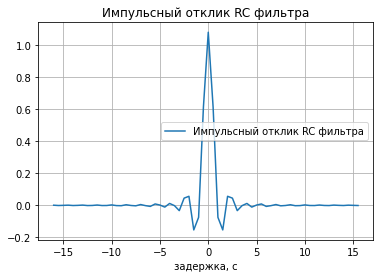

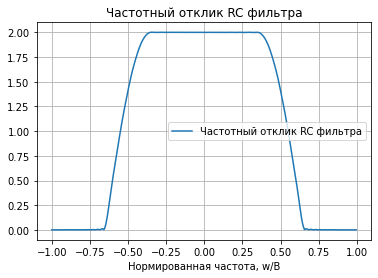

In [41]:
import  matplotlib.pyplot as plt
import  numpy as np
from    scipy import signal
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
M               = 64    # filter's length
beta            = 0.3   # Roll-off factor
Ts              = 1     # Baud period
Fs              = 2     # Sampling frequency
time_idx,h      = rcosfilter(M, beta, Ts, Fs)
plt.figure()
plt.plot(time_idx,h)
plt.grid('true')
plt.legend(['Импульсный отклик RC фильтра'])
plt.xlabel('задержка, с')
plt.title('Импульсный отклик RC фильтра')
omega,H=signal.freqz(h,whole=True)
plt.figure()
plt.plot((omega/np.pi)-1,np.fft.fftshift(abs(H)))
plt.grid('true')
plt.legend(['Частотный отклик RC фильтра'])
plt.xlabel('Нормированная частота, w/B')
plt.title('Частотный отклик RC фильтра')

Результат применения RC фильтра к сигналу $y$:


Text(0.5, 1.0, 'Спектральная плотность в базовой полосе')

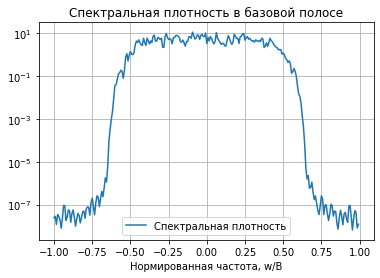

In [45]:
import  matplotlib.pyplot as plt
import  numpy as np
from    scipy import signal
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
M               = 64    # filter's length
beta            = 0.3   # Roll-off factor
Ts              = 1     # Baud period
Fs              = 2     # Sampling frequency
time_idx,h      = rcosfilter(M, beta, Ts, Fs)
y_rc            = np.convolve(h,y)

frex,Pxx  = signal.welch( y_rc,return_onesided=False,nperseg=256, noverlap=210,fs=2)
plt.semilogy( np.fft.fftshift(frex),np.fft.fftshift(Pxx) )
#plt.ylim([0.5e-3, 100])
plt.grid('true')
plt.legend(['Спектральная плотность'])
plt.xlabel('Нормированная частота, w/B')
plt.title('Спектральная плотность в базовой полосе')


С точки зрения устойчивости к шуму использование RC фильтра на передающей стороне не выгодно. Пр таком подходе на приемной стороне фильтрация не предусмотрена и вся энергия принятого шума прибавится к символам. Вместо этого на практике RC фильтр разделяют на два идентичных фильтра, применяемые на передающей и принимающей сторонах. Такой фильтр называется RRC (Root Raised Cosine Filter). 

При этом частотная характеристика RC фильтра равна произведению частотных характеристик формирующего RRC фильтра на передатчике на такую же характеристику согласованного RRC фильтра на приемной стороне.

**Задание**
1. Проверить что два RC импульса имеют нудевую корреляцию при сдвиге на период следования символа. (построить автокорреляционную функцию RC импульса).
2. Сформировать комплекснозначную последовательность символов 16QAM, увеличить частоту дискретизации в два раза путем вставки нулей, профильтровать полученную последовательность с помощью RRC фильтра (передающая сторона), еще раз прменить RRC фильтр (приемная сторона), перейти к символьной скорости путем отбрасывания каждого второго отсчета. Сравнить принятые символы с переданными.